# Week 6 Homework: Collaborative Task 
Group: Charles, Cleighton, & Carter <br>
06/16/2023 

Dataset: [Data Science Salaries 2023](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023?resource=download)

In [1]:
import pandas as pd
import numpy as np 

In [7]:
ds = pd.read_csv('ds_salaries.csv')
ds.head() 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
ds.shape

(3755, 11)

In [8]:
ds.describe() # summary statistics for numerical values in dataset 

#interesting that remote_ratio is less that 50%, it's definitely an industry that has embraced remote work. 

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [29]:
#What types of jobs are in this dataset ? 

ds.job_title.unique()
#wow, many job titles, perhaps it will help to separate the engineers, scientists, managers, analysts, modeler... 


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [27]:
#are there any NaNs in this dataset? 

ds.isnull().sum()   #nope! clean as a whistle

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
#what is the range of time for this data? 
min = ds.work_year.min() 
max = ds.work_year.max() 

print(f'This dataset describes salaries between {min} and {max}.')

This dataset describes salaries between 2020 and 2023.


In [8]:
#experience_level 

ds.experience_level.unique()

'''
what do these acronyms mean ? [SE, MI, EN, EX]

SE = senior/expert 
MI = mid/intermediate 
EN = entry level 
EX = executive/director 

perhaps we add a column with a numerical scale 1:4 to indicate experience level? 
'''

mapping = {'SE': 3, 'MI': 2, 'EN': 1, 'EX': 4}
ds['experience_number'] = ds['experience_level'].map(mapping)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_number
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,3
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,2
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,1
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,1


<Axes: ylabel='Frequency'>

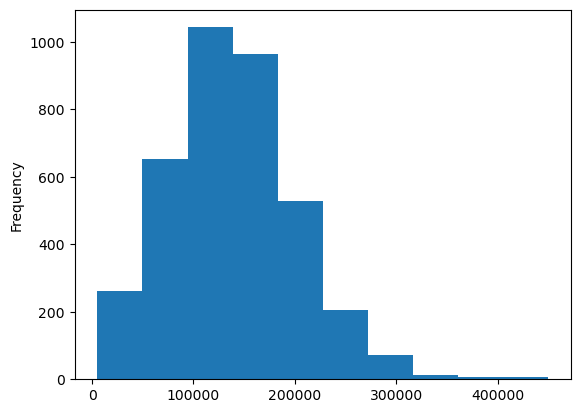

In [31]:
#histogram of salaries (in USD) in this dataset 
ds['salary_in_usd'].plot.hist() 

<Axes: >

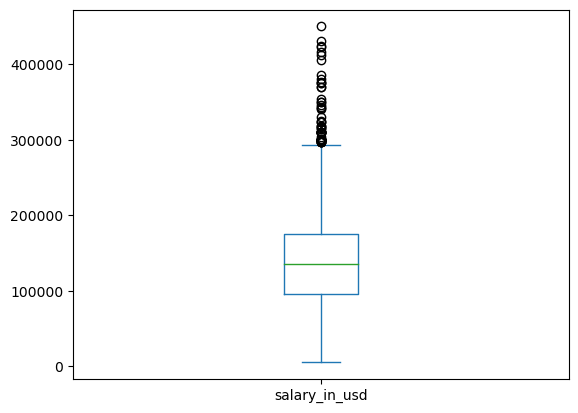

In [8]:
ds['salary_in_usd'].plot.box() 

## Questions for this dataset: 

* what is the difference in  average salary (in USD) between US and EUROZONE salaries? 